valores nulos Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life 

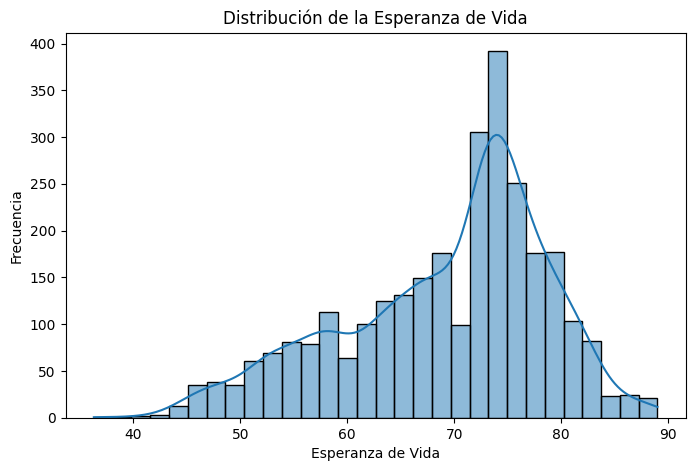

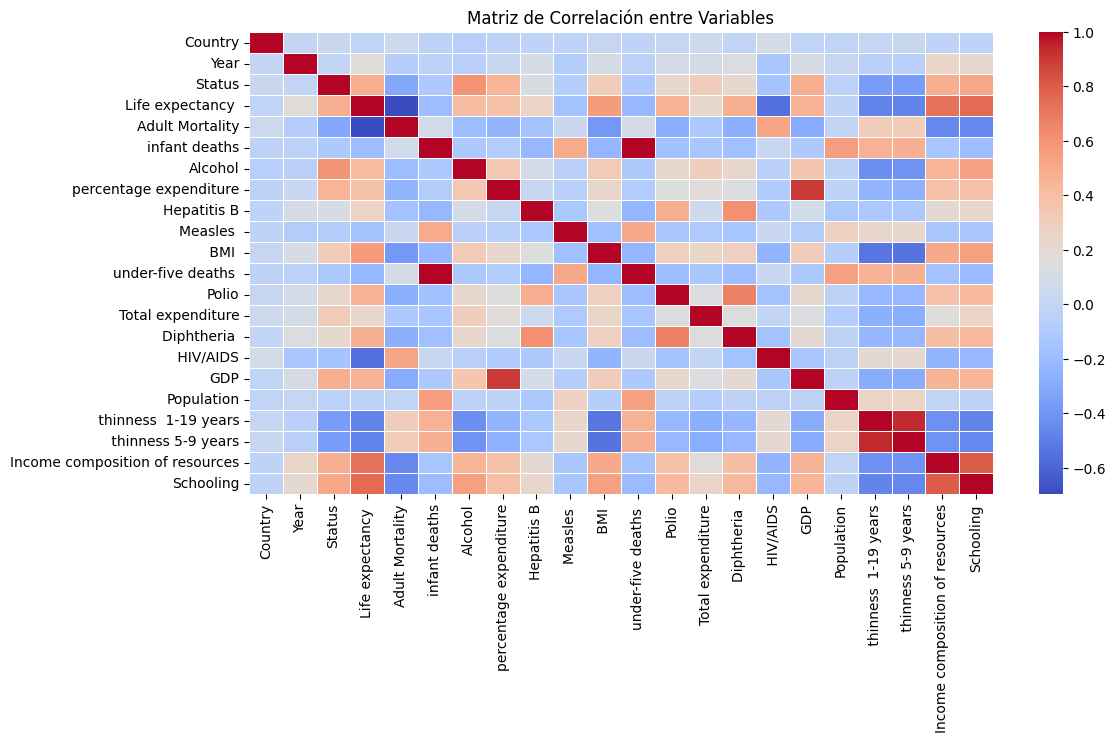

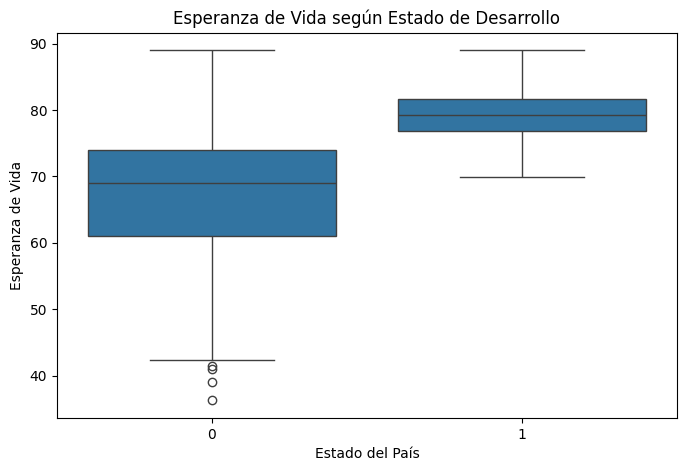

Correlaciones con la variable objetivo:
Life expectancy                    1.000000
Schooling                          0.713054
Income composition of resources    0.688662
 BMI                               0.556901
Status                             0.481415
Diphtheria                         0.472211
Polio                              0.458399
GDP                                0.430461
Alcohol                            0.388918
percentage expenditure             0.381418
Total expenditure                  0.208844
Year                               0.170819
Hepatitis B                        0.170219
Country                           -0.016402
Population                        -0.029014
Measles                           -0.157767
infant deaths                     -0.196769
under-five deaths                 -0.222738
 thinness 5-9 years               -0.462473
 thinness  1-19 years             -0.468002
 HIV/AIDS                         -0.556703
Adult Mortality                   -0

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

#dataset
df = pd.read_csv("Life Expectancy Data.csv")

#verificar valores nulos
missing_values = df.isnull().sum()
print("valores nulos", missing_values[missing_values > 0])

df.info()

# Mapear los valores de Status a 0 y 1
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna de países
df["Country"] = label_encoder.fit_transform(df["Country"])

# Distribución de la variable objetivo (Esperanza de vida)
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy "].dropna(), bins=30, kde=True)
plt.title("Distribución de la Esperanza de Vida")
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Boxplot de esperanza de vida por país desarrollado vs. en desarrollo
plt.figure(figsize=(8, 5))
sns.boxplot(x="Status", y="Life expectancy ", data=df)
plt.title("Esperanza de Vida según Estado de Desarrollo")
plt.xlabel("Estado del País")
plt.ylabel("Esperanza de Vida")
plt.show()

# 1. Manejo de valores nulos: Rellenamos con la mediana de cada columna numérica
df.fillna(df.median(numeric_only=True), inplace=True)


X = df.drop(["Life expectancy "], axis=1)
y = df["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar la variable objetivo nuevamente al DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["Life expectancy "] = y

# Calcular la correlación de las variables con el precio de la vivienda
correlaciones = df_scaled.corr()["Life expectancy "].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)



# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")





valores nulos Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life 

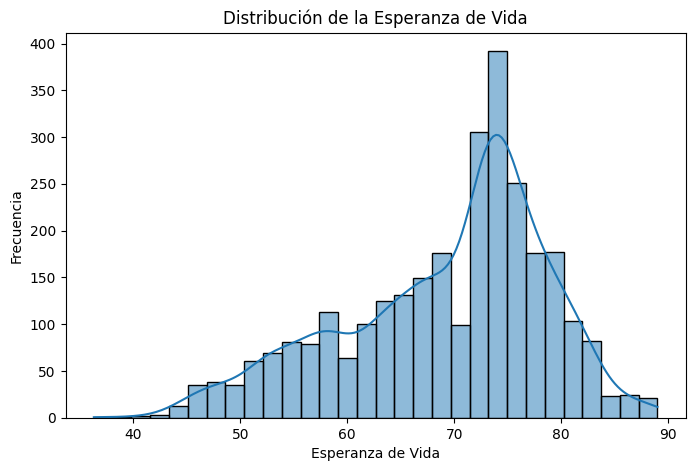

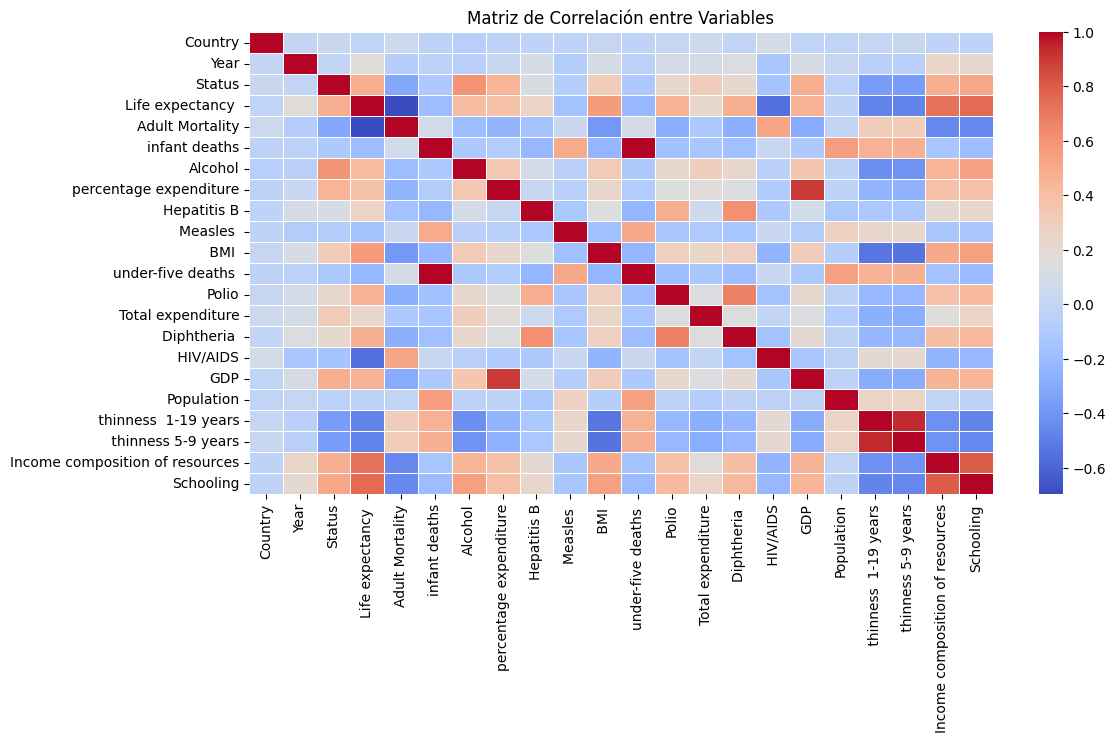

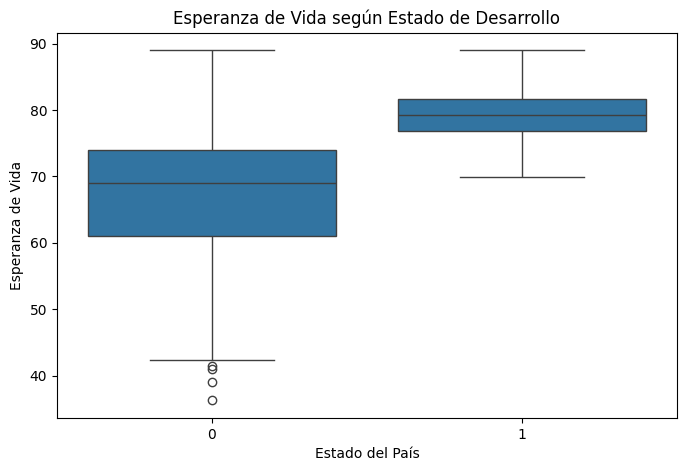

Correlaciones con la variable objetivo:
Life expectancy                    1.000000
Schooling                          0.713054
Income composition of resources    0.688662
 BMI                               0.556901
Status                             0.481415
Diphtheria                         0.472211
Polio                              0.458399
GDP                                0.430461
Alcohol                            0.388918
percentage expenditure             0.381418
Total expenditure                  0.208844
Hepatitis B                        0.170219
 HIV/AIDS                         -0.556703
Name: Life expectancy , dtype: float64
VIF de cada variable:
                           Variable       VIF
0                            Status  1.853818
1                           Alcohol  1.731285
2            percentage expenditure  5.765468
3                       Hepatitis B  1.279860
4                              BMI   1.451345
5                             Polio  1.922254
6    

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

#dataset
df = pd.read_csv("Life Expectancy Data.csv")

#verificar valores nulos
missing_values = df.isnull().sum()
print("valores nulos", missing_values[missing_values > 0])

df.info()

# Mapear los valores de Status a 0 y 1
df["Status"] = df["Status"].map({"Developing": 0, "Developed": 1})

# Inicializar el codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna de países
df["Country"] = label_encoder.fit_transform(df["Country"])

# Distribución de la variable objetivo (Esperanza de vida)
plt.figure(figsize=(8, 5))
sns.histplot(df["Life expectancy "].dropna(), bins=30, kde=True)
plt.title("Distribución de la Esperanza de Vida")
plt.xlabel("Esperanza de Vida")
plt.ylabel("Frecuencia")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

# Boxplot de esperanza de vida por país desarrollado vs. en desarrollo
plt.figure(figsize=(8, 5))
sns.boxplot(x="Status", y="Life expectancy ", data=df)
plt.title("Esperanza de Vida según Estado de Desarrollo")
plt.xlabel("Estado del País")
plt.ylabel("Esperanza de Vida")
plt.show()

# 1. Manejo de valores nulos: Rellenamos con la mediana de cada columna numérica
df.fillna(df.median(numeric_only=True), inplace=True)


X = df.drop(["Life expectancy ", "under-five deaths ","infant deaths", " thinness 5-9 years"," thinness  1-19 years", "Adult Mortality", "Measles ", "Country", "Population", "Year" ], axis=1)
y = df["Life expectancy "]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agregar la variable objetivo nuevamente al DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["Life expectancy "] = y

# Calcular la correlación de las variables con el precio de la vivienda
correlaciones = df_scaled.corr()["Life expectancy "].sort_values(ascending=False)

# Mostrar la correlación de cada variable con la variable objetivo
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Mostrar los resultados
print("VIF de cada variable:")
print(vif_data)



# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener los coeficientes
coeficientes = pd.Series(modelo.coef_, index=X.columns)

# Mostrar el intercepto y los coeficientes
print("Intercepto:", modelo.intercept_)
print("Coeficientes:")
print(coeficientes)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")





Mean Squared Error (MSE): 6.95


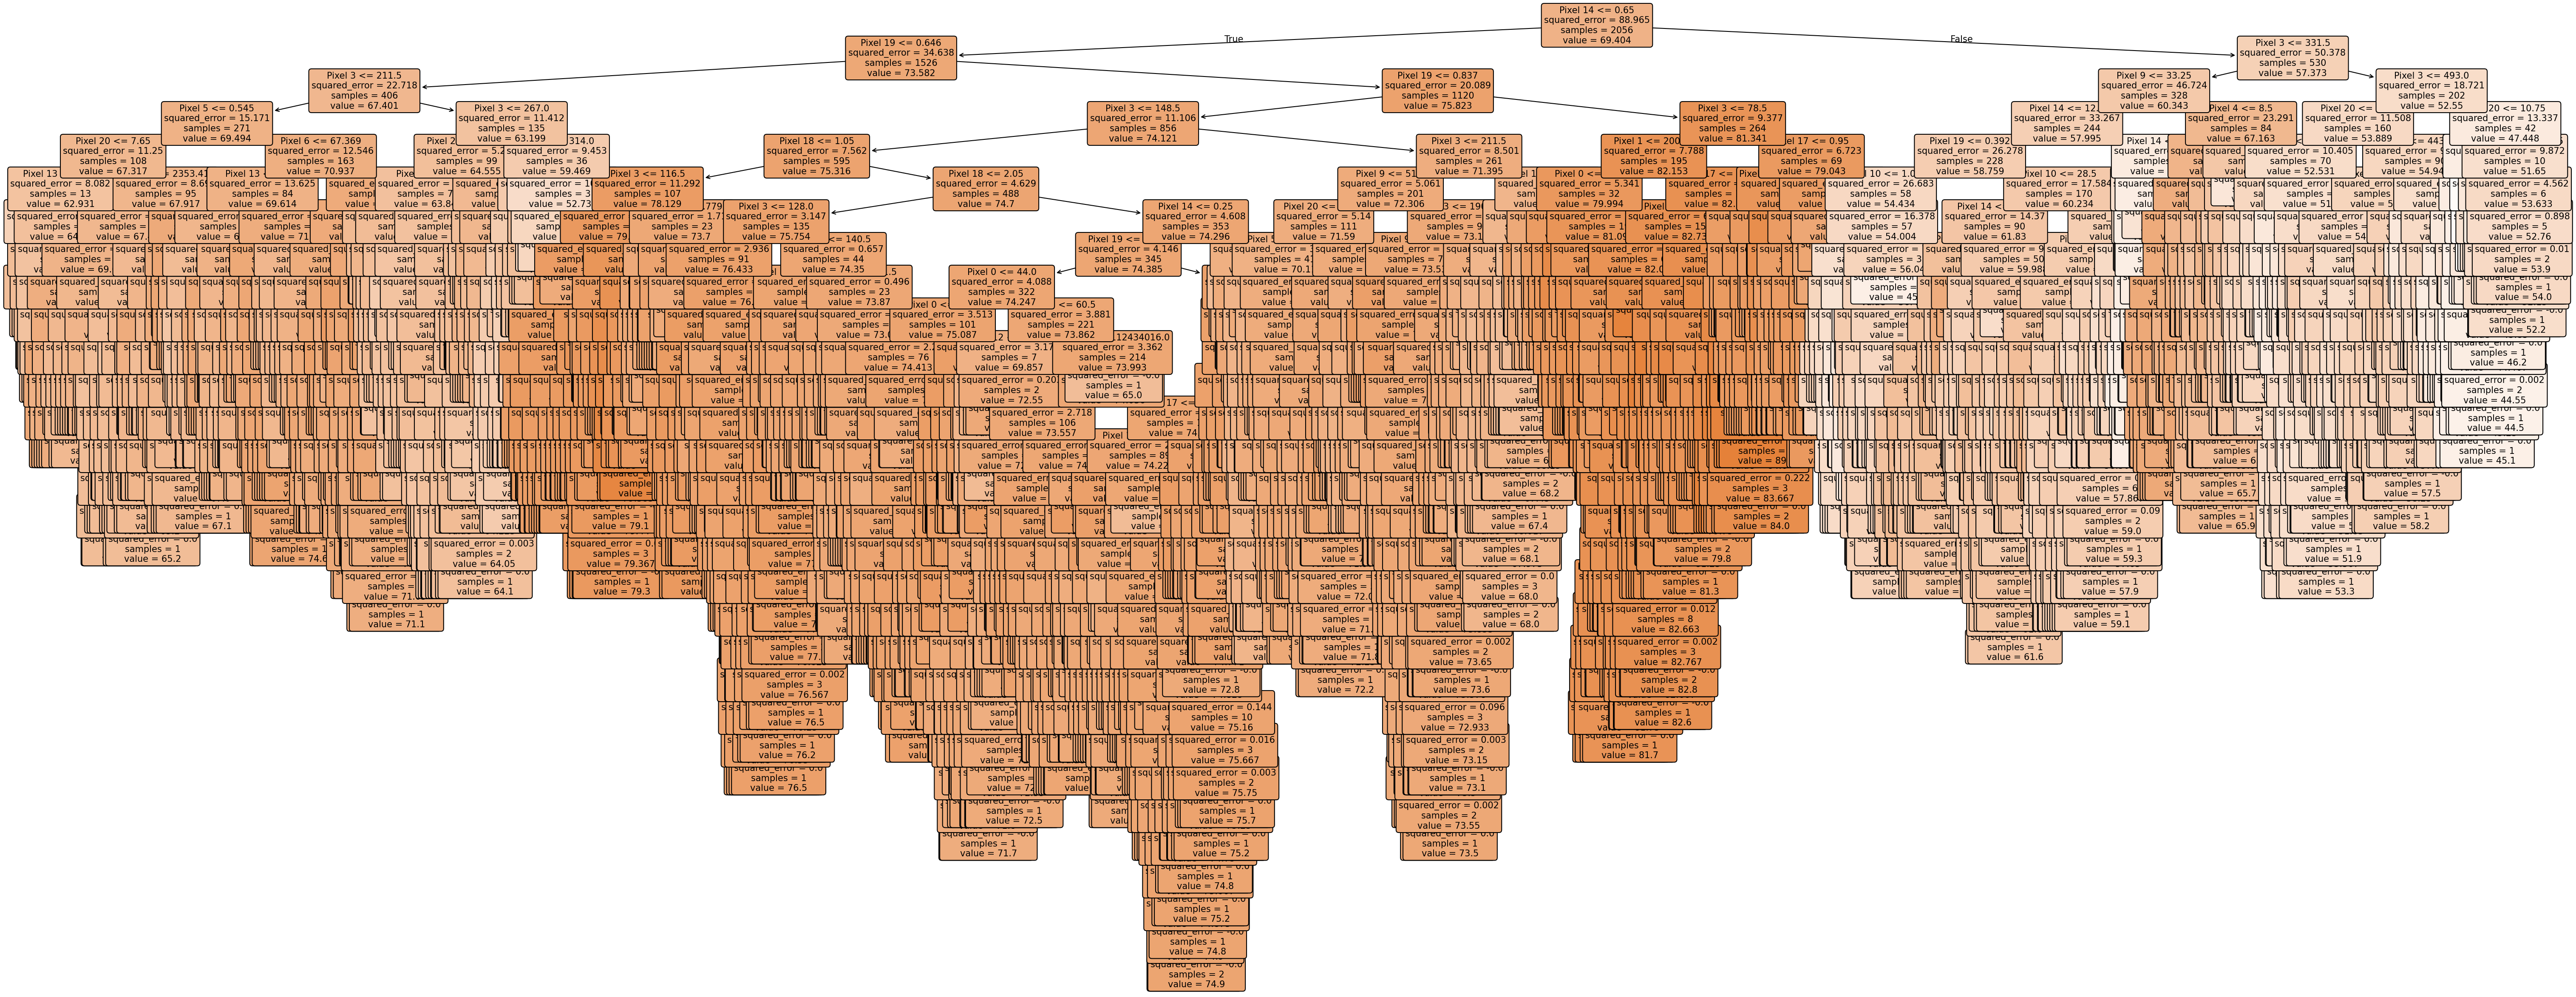

MAE (Error Absoluto Medio): 1.5993
MSE (Error Cuadrático Medio): 6.9529
RMSE (Raíz del Error Cuadrático Medio): 2.6368
R² (Coeficiente de Determinación): 0.9256


In [23]:
# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

X = df.drop(["Life expectancy "], axis=1)
y = df["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')


# Visualizar el árbol de decisión
plt.figure(figsize=(50, 20), dpi=150)  # Ajuste de dpi para mejorar la resolución
tree.plot_tree(
    model, 
    filled=True, 
    feature_names=[f'Pixel {i}' for i in range(X.shape[1])], 
    class_names=[str(i) for i in range(10)],
    fontsize=10,  # Reducir el tamaño de fuente para mejor legibilidad
    rounded=True,  # Bordes redondeados para mayor claridad
    proportion=False  # Evitar que los nodos se expandan demasiado
)
plt.show()

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


MAE (Error Absoluto Medio): 1.1489
MSE (Error Cuadrático Medio): 3.3924
RMSE (Raíz del Error Cuadrático Medio): 1.8418
R² (Coeficiente de Determinación): 0.9637


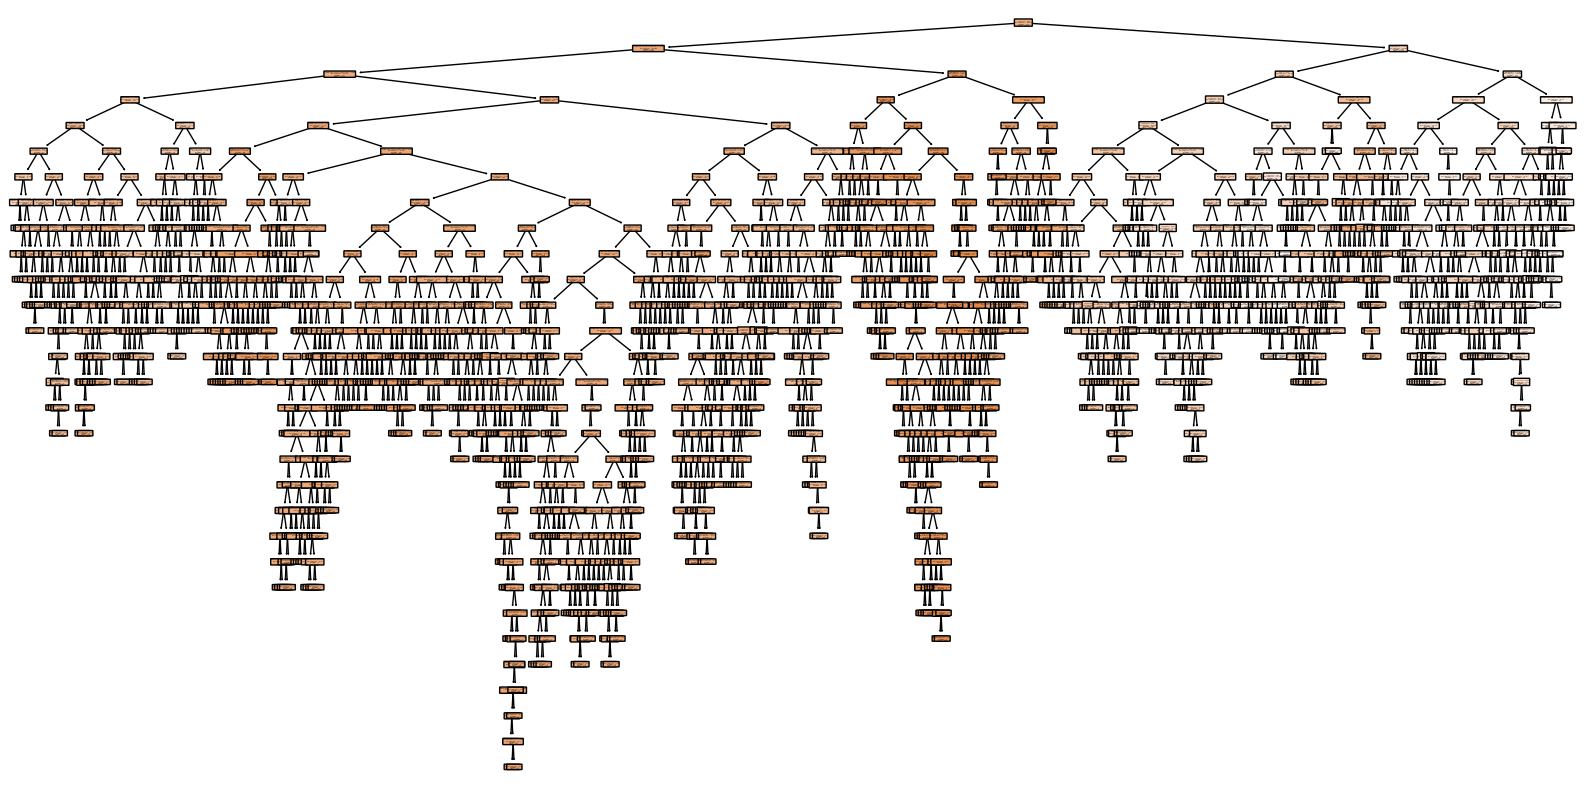

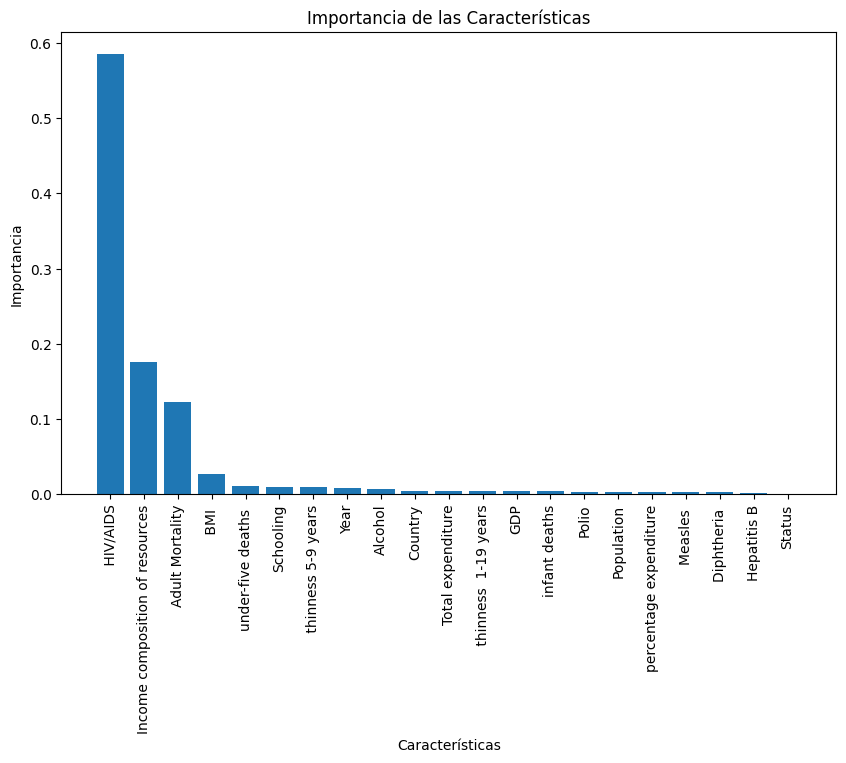

In [28]:
from sklearn.ensemble import RandomForestRegressor


X = df.drop(["Life expectancy "], axis=1)
y = df["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)


# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

# Visualizar el árbol de decisión
from sklearn.tree import plot_tree

# Seleccionar un árbol específico dentro del bosque
single_tree = model.estimators_[0]

# Graficar el árbol seleccionado
plt.figure(figsize=(20, 10))
plot_tree(single_tree, 
          filled=True, 
          feature_names=X.columns,  # Asegurar que se usen los nombres correctos de las características
          rounded=True)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de cada característica
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Graficar las importancias
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()


